In [3]:
import pandas as pd

# Load zoo.csv with proper encoding
try:
    zoo_df = pd.read_csv("zoo.csv", encoding="utf-8")
except UnicodeDecodeError:
    zoo_df = pd.read_csv("zoo.csv", encoding="latin1")

print("Zoo Dataset Loaded Successfully:")
print(zoo_df.head())


Zoo Dataset Loaded Successfully:
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1  

In [4]:
class_df = pd.read_csv("class.csv")
print(class_df.head())


   Class_Number  Number_Of_Animal_Species_In_Class Class_Type  \
0             1                                 41     Mammal   
1             2                                 20       Bird   
2             3                                  5    Reptile   
3             4                                 13       Fish   
4             5                                  4  Amphibian   

                                        Animal_Names  
0  aardvark, antelope, bear, boar, buffalo, calf,...  
1  chicken, crow, dove, duck, flamingo, gull, haw...  
2    pitviper, seasnake, slowworm, tortoise, tuatara  
3  bass, carp, catfish, chub, dogfish, haddock, h...  
4                             frog, frog, newt, toad  


In [19]:
# Load raw JSON
with open("auxiliary_metadata.json") as f:
    raw_json = json.load(f)

cleaned_records = []

for entry in raw_json:
    cleaned = {
        "animal_name": entry.get("animal_name"),

        # Fix habitat field variations
        "habitat": entry.get("habitat") or entry.get("habitats") or None,

        # Fix diet field variations and spelling errors
        "diet": (entry.get("diet") or entry.get("diet_type") or "").replace("omnivor", "omnivore"),

        # Fix conservation field variations
        "conservation_status": (
            entry.get("conservation_status")
            or entry.get("conservation")
            or entry.get("status")
            or "unknown"
        )
    }

    cleaned_records.append(cleaned)

# Convert to DataFrame
metadata_df = pd.DataFrame(cleaned_records)

print("Auxiliary Metadata Loaded & Cleaned:")
print(metadata_df)


Auxiliary Metadata Loaded & Cleaned:
   animal_name         habitat           diet conservation_status
0     aardvark         savanna    insectivore       least concern
1     antelope      grasslands      herbivore     near threatened
2         bass      freshwater      carnivore               least
3         bear          forest      omnivoree          vulnerable
4         boar          forest       omnivore       least concern
5      buffalo      grasslands      herbivore          endangered
6         calf        domestic      herbivore             unknown
7         carp     fresh water      omnivoree       least concern
8      catfish      FreshWater      carnivore             unknown
9         clam          marine  filter_feeder       least concern
10        crab  marine/coastal      omnivoree       least concern
11        deer          Forest      Herbivore          vulnerable


In [20]:
# Convert animal names in zoo_df to uppercase
zoo_df["animal_name"] = zoo_df["animal_name"].str.upper()

# Convert animal names in metadata_df to uppercase
metadata_df["animal_name"] = metadata_df["animal_name"].str.upper()

print("Animal names converted to uppercase successfully!")
print(zoo_df.head())
print(metadata_df.head())


Animal names converted to uppercase successfully!
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    AARDVARK     1         0     0     1         0        0         1   
1    ANTELOPE     1         0     0     1         0        0         0   
2        BASS     0         0     1     0         0        1         1   
3        BEAR     1         0     0     1         0        0         1   
4        BOAR     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0 

In [21]:
cleaned_records = []

for entry in raw_json:

    # ---- 1. FIX FIELD NAME INCONSISTENCIES ----
    conservation = (
        entry.get("conservation_status")
        or entry.get("conservation")
        or entry.get("status")
        or "unknown"
    )

    habitat = (
        entry.get("habitat")
        or entry.get("habitats")
        or None
    )

    diet_value = (
        entry.get("diet")
        or entry.get("diet_type")
        or ""
    )

    # ---- 2. FIX TYPOS IN DIET CATEGORIES ----
    diet_value = diet_value.lower()
    diet_value = diet_value.replace("omnivor", "omnivore")

    # Standardize diet categories
    if diet_value in ["herbivore", "carnivore", "omnivore", "insectivore", "filter_feeder"]:
        final_diet = diet_value
    else:
        final_diet = "other"

    # ---- 3. STANDARDIZE HABITAT VALUES ----
    if habitat:
        habitat = habitat.lower()
        habitat = habitat.replace("fresh water", "freshwater")
        habitat = habitat.replace("freshwater", "freshwater")
        habitat = habitat.replace("freshwater", "freshwater")
        habitat = habitat.replace("/", "_")
        habitat = habitat.strip()
    else:
        habitat = "unknown"

    cleaned = {
        "animal_name": entry.get("animal_name").upper(),
        "habitat_type": habitat,
        "diet": final_diet,
        "conservation_status": conservation.lower()
    }

    cleaned_records.append(cleaned)

# Convert cleaned list to DataFrame
metadata_df = pd.DataFrame(cleaned_records)
print(metadata_df)


   animal_name    habitat_type           diet conservation_status
0     AARDVARK         savanna    insectivore       least concern
1     ANTELOPE      grasslands      herbivore     near threatened
2         BASS      freshwater      carnivore               least
3         BEAR          forest          other          vulnerable
4         BOAR          forest       omnivore       least concern
5      BUFFALO      grasslands      herbivore          endangered
6         CALF        domestic      herbivore             unknown
7         CARP      freshwater          other       least concern
8      CATFISH      freshwater      carnivore             unknown
9         CLAM          marine  filter_feeder       least concern
10        CRAB  marine_coastal          other       least concern
11        DEER          forest      herbivore          vulnerable


In [26]:
print("ZOO DF COLUMNS:", zoo_df.columns.tolist())
print("CLASS DF COLUMNS:", class_df.columns.tolist())
print("METADATA DF COLUMNS:", metadata_df.columns.tolist())


ZOO DF COLUMNS: ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
CLASS DF COLUMNS: ['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Class_Type', 'Animal_Names']
METADATA DF COLUMNS: ['animal_name', 'habitat_type', 'diet', 'conservation_status']


In [28]:
# ---------------------------------
# TASK 1(D): MERGE ALL DATASETS
# ---------------------------------

# STEP 1: Rename the class column in class_df
class_df.rename(columns={"Class_Type": "class_type"}, inplace=True)

# Convert class_type to numeric on BOTH tables
zoo_df["class_type"] = pd.to_numeric(zoo_df["class_type"], errors="coerce")
class_df["class_type"] = pd.to_numeric(class_df["class_type"], errors="coerce")


# STEP 2: Merge zoo_df with metadata_df
merged_df = pd.merge(
    zoo_df,
    metadata_df,
    on="animal_name",
    how="left"
)


# STEP 3: Fill missing metadata values (safe way, NO warnings)
merged_df = merged_df.assign(
    habitat_type = merged_df["habitat_type"].fillna("unknown"),
    diet = merged_df["diet"].fillna("unknown"),
    conservation_status = merged_df["conservation_status"].fillna("unknown")
)


# STEP 4: Merge with class_df on class_type (works now)
final_df = pd.merge(
    merged_df,
    class_df,
    on="class_type",
    how="left"
)


# OUTPUT
print("Final Merged Dataset:")
print(final_df.head())
print("Final Shape:", final_df.shape)


Final Merged Dataset:
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    AARDVARK     1         0     0     1         0        0         1   
1    ANTELOPE     1         0     0     1         0        0         0   
2        BASS     0         0     1     0         0        1         1   
3        BEAR     1         0     0     1         0        0         1   
4        BOAR     1         0     0     1         0        0         1   

   toothed  backbone  ...  tail  domestic  catsize  class_type  habitat_type  \
0        1         1  ...     0         0        1           1       savanna   
1        1         1  ...     1         0        1           1    grasslands   
2        1         1  ...     1         0        0           4    freshwater   
3        1         1  ...     0         0        1           1        forest   
4        1         1  ...     1         0        1           1        forest   

          diet  conservation_status  Class_Number  \

In [29]:
# -----------------------------------------
# TASK 1(E): HANDLING MISSING VALUES
# -----------------------------------------

# STEP 1: Identify numerical and categorical columns
numeric_cols = final_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = final_df.select_dtypes(include=['object']).columns

print("Numeric columns:", numeric_cols.tolist())
print("Categorical columns:", categorical_cols.tolist())


# STEP 2: Fill numeric missing values with MEDIAN
for col in numeric_cols:
    median_value = final_df[col].median()
    final_df[col] = final_df[col].fillna(median_value)


# STEP 3: Fill categorical missing values with "unknown"
for col in categorical_cols:
    final_df[col] = final_df[col].fillna("unknown")


# STEP 4: Show final missing value check
print("Missing Values After Handling:")
print(final_df.isna().sum())


Numeric columns: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type', 'Class_Number', 'Number_Of_Animal_Species_In_Class']
Categorical columns: ['animal_name', 'habitat_type', 'diet', 'conservation_status', 'Animal_Names']
Missing Values After Handling:
animal_name                            0
hair                                   0
feathers                               0
eggs                                   0
milk                                   0
airborne                               0
aquatic                                0
predator                               0
toothed                                0
backbone                               0
breathes                               0
venomous                               0
fins                                   0
legs                                   0
tail                                   0
dome

In [30]:
# -----------------------------------------
# TASK 1(F): FEATURE ENGINEERING
# -----------------------------------------

# FEATURE 1:
# Animals that are either aquatic or airborne have special locomotion adaptations.
# This feature helps classify animals based on flying/swimming ability.
final_df["is_aquatic_or_airborne"] = final_df.apply(
    lambda row: 1 if (row["aquatic"] == 1 or row["airborne"] == 1) else 0,
    axis=1
)

# FEATURE 2:
# Mammal-like animals usually have hair AND produce milk.
# This feature helps separate mammals from reptiles, birds, fish, etc.
final_df["is_mammal_like"] = final_df.apply(
    lambda row: 1 if (row["hair"] == 1 and row["milk"] == 1) else 0,
    axis=1
)

# Show new engineered features
print("Feature Engineering Completed:")
print(final_df[["animal_name", "is_aquatic_or_airborne", "is_mammal_like"]].head())


Feature Engineering Completed:
  animal_name  is_aquatic_or_airborne  is_mammal_like
0    AARDVARK                       0               1
1    ANTELOPE                       0               1
2        BASS                       1               0
3        BEAR                       0               1
4        BOAR                       0               1


In [31]:
# -----------------------------------------
# TASK 1(G): REQUIRED OUTPUT
# Display the final cleaned + merged + engineered dataset
# -----------------------------------------

print("FINAL DATASET (AFTER TASK A–F):")
print(final_df.head(20))       # Show first 20 rows

print("\nDATASET SHAPE:")
print(final_df.shape)

print("\nSUMMARY OF COLUMNS:")
print(final_df.dtypes)

print("\nCHECK MISSING VALUES:")
print(final_df.isna().sum())


FINAL DATASET (AFTER TASK A–F):
   animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0     AARDVARK     1         0     0     1         0        0         1   
1     ANTELOPE     1         0     0     1         0        0         0   
2         BASS     0         0     1     0         0        1         1   
3         BEAR     1         0     0     1         0        0         1   
4         BOAR     1         0     0     1         0        0         1   
5      BUFFALO     1         0     0     1         0        0         0   
6         CALF     1         0     0     1         0        0         0   
7         CARP     0         0     1     0         0        1         0   
8      CATFISH     0         0     1     0         0        1         1   
9         CAVY     1         0     0     1         0        0         0   
10     CHEETAH     1         0     0     1         0        0         1   
11     CHICKEN     0         1     1     0         1        0       

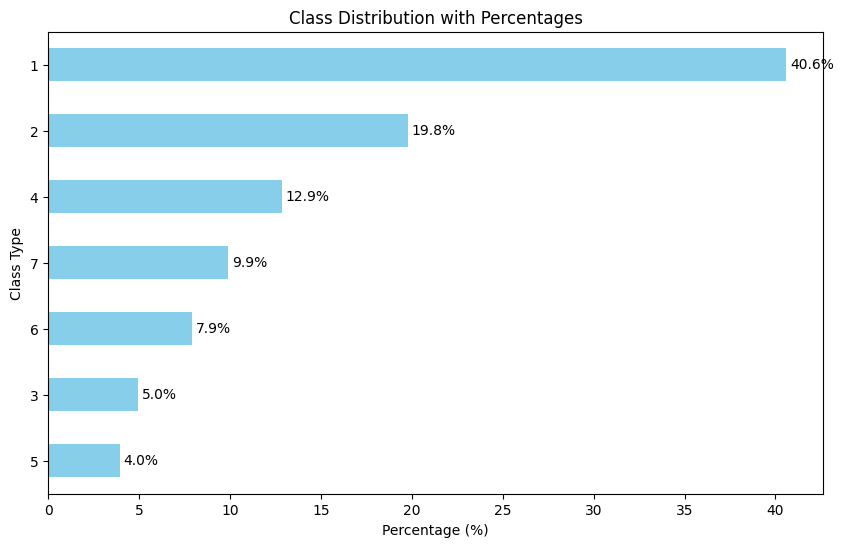

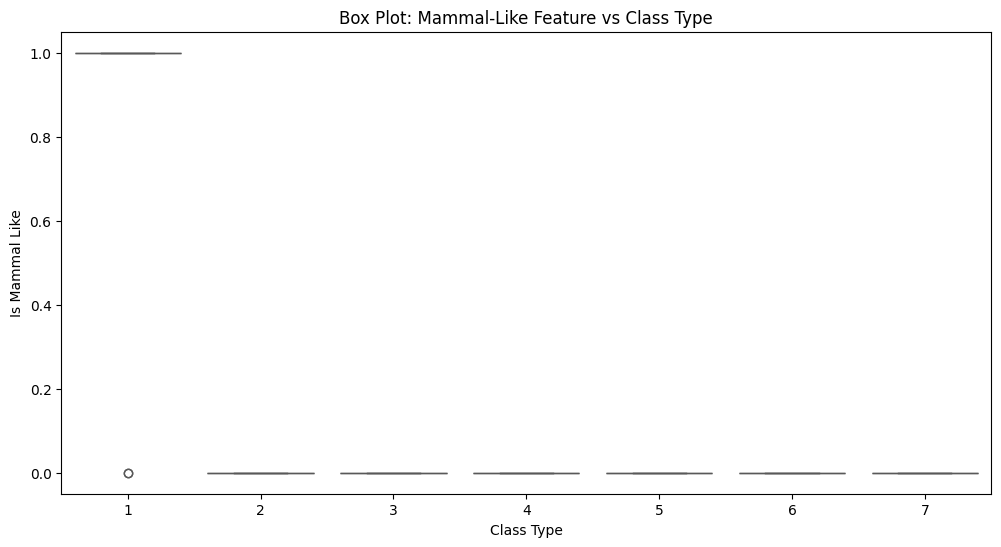

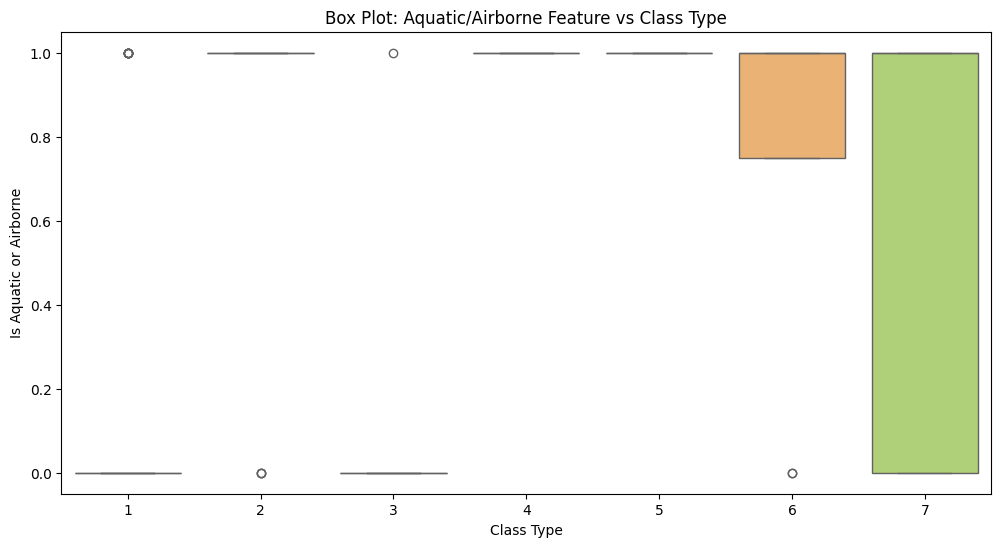

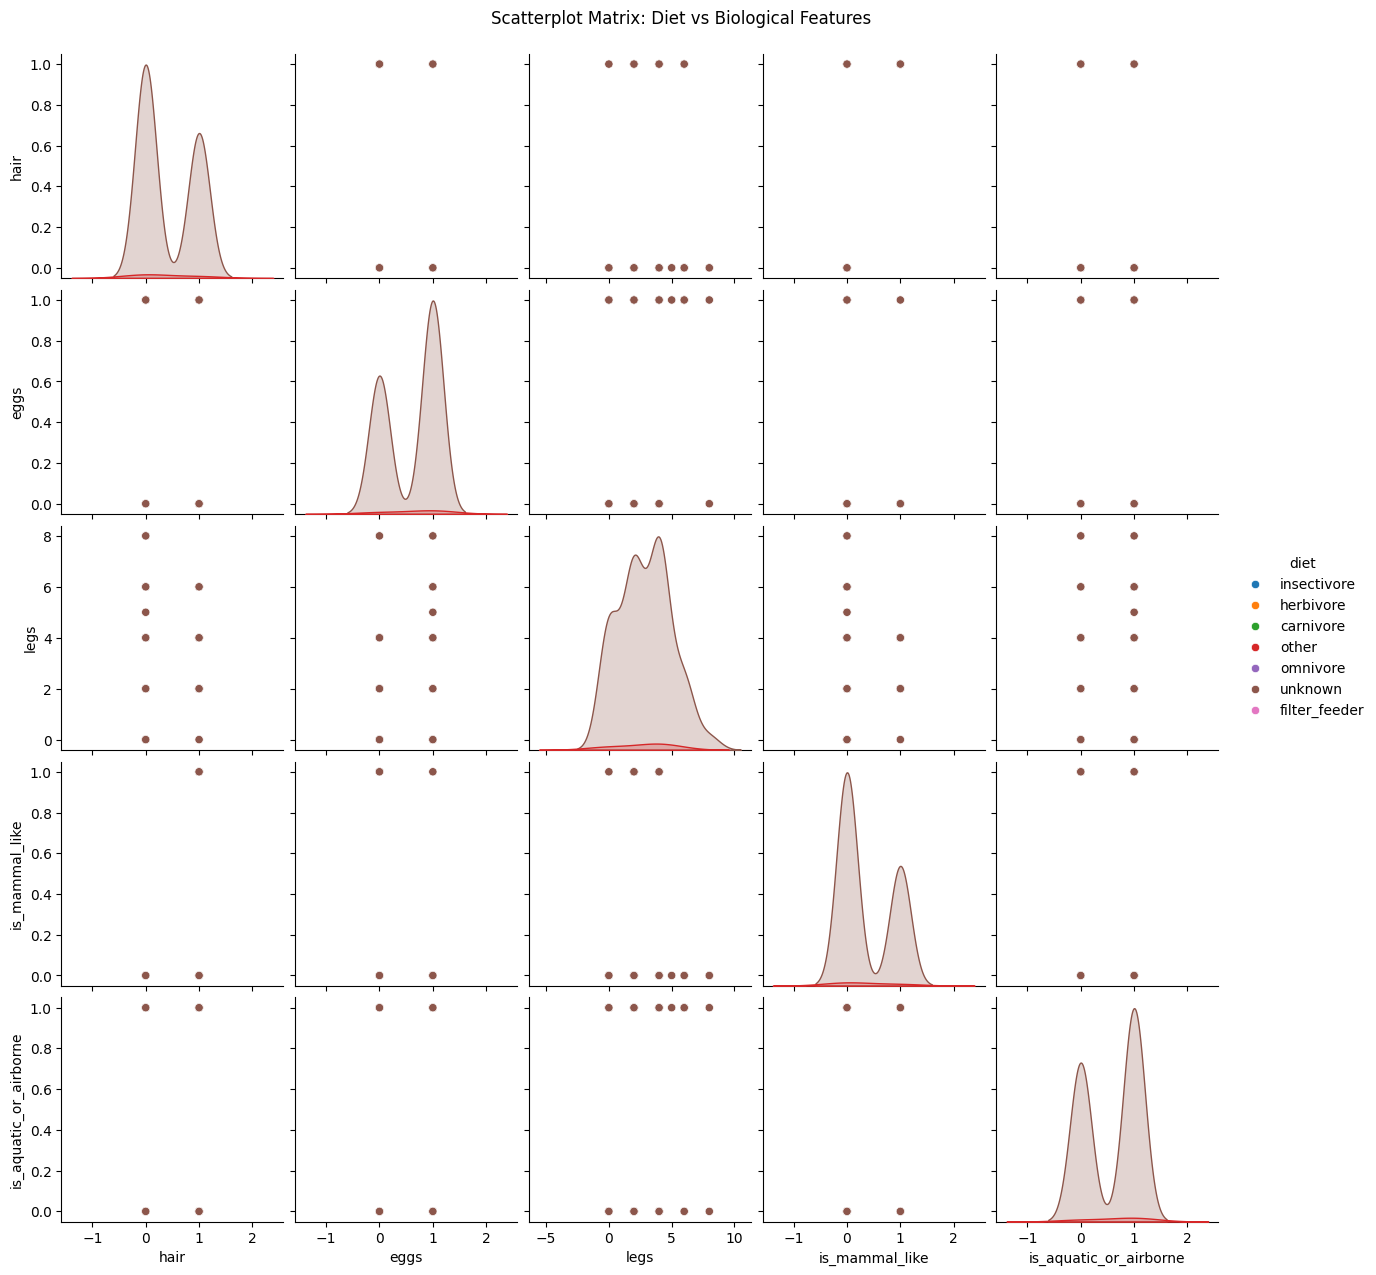

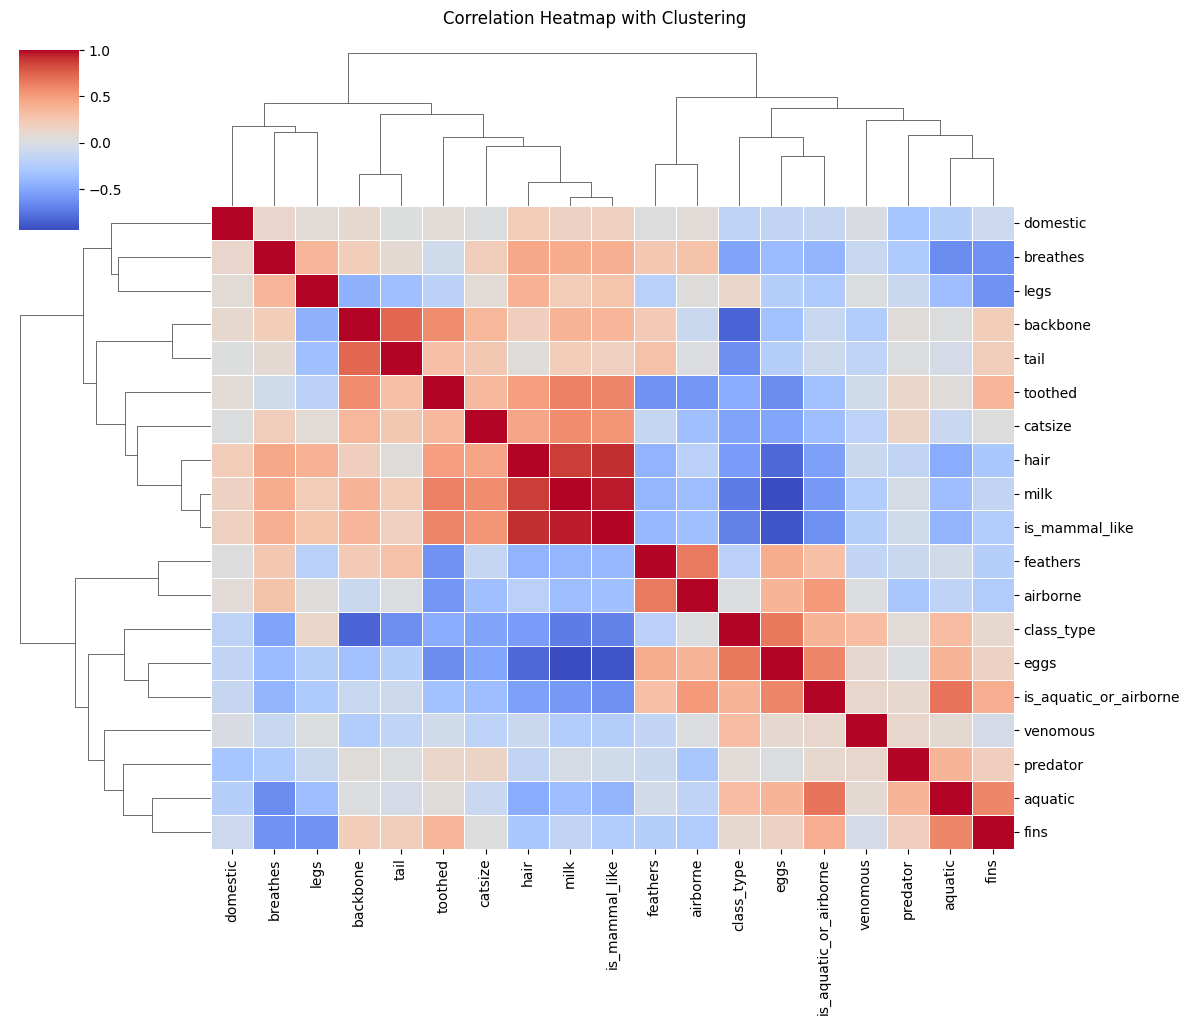

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def omega_eda_and_cleaning(final_df):

    # ----------------------------------------------------------
    # A. HORIZONTAL BAR CHART: CLASS DISTRIBUTION WITH PERCENTAGES
    # ----------------------------------------------------------
    plt.figure(figsize=(10,6))
    class_counts = final_df["class_type"].value_counts()
    class_percent = (class_counts / len(final_df)) * 100

    class_percent.sort_values().plot(kind='barh', color='skyblue')
    plt.title("Class Distribution with Percentages")
    plt.xlabel("Percentage (%)")
    plt.ylabel("Class Type")

    for idx, value in enumerate(class_percent.sort_values()):
        plt.text(value + 0.2, idx, f"{value:.1f}%", va='center')

    plt.show()


    # ----------------------------------------------------------
    # B. BOX PLOT: ENGINEERED FEATURES vs CLASS TYPE
    # (future warning fix: use hue=x)
    # ----------------------------------------------------------
    plt.figure(figsize=(12,6))
    sns.boxplot(
        data=final_df,
        x="class_type",
        y="is_mammal_like",
        hue="class_type",
        legend=False,
        palette="Set2"
    )
    plt.title("Box Plot: Mammal-Like Feature vs Class Type")
    plt.xlabel("Class Type")
    plt.ylabel("Is Mammal Like")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.boxplot(
        data=final_df,
        x="class_type",
        y="is_aquatic_or_airborne",
        hue="class_type",
        legend=False,
        palette="Set3"
    )
    plt.title("Box Plot: Aquatic/Airborne Feature vs Class Type")
    plt.xlabel("Class Type")
    plt.ylabel("Is Aquatic or Airborne")
    plt.show()


    # ----------------------------------------------------------
    # C. SCATTERPLOT MATRIX: DIET vs FEATURES
    # ----------------------------------------------------------
    sns.pairplot(
        final_df,
        vars=["hair", "eggs", "legs", "is_mammal_like", "is_aquatic_or_airborne"],
        hue="diet",
        diag_kind="kde"
    )
    plt.suptitle("Scatterplot Matrix: Diet vs Biological Features", y=1.02)
    plt.show()


    # ----------------------------------------------------------
    # D. CORRELATION HEATMAP WITH CLUSTERING
    # FIX: remove nan, infinite, and constant columns
    # ----------------------------------------------------------

    corr = final_df.corr(numeric_only=True)

    # replace nan/infinite
    corr = corr.replace([np.inf, -np.inf], np.nan)
    corr = corr.fillna(0)

    # remove constant columns (variance = 0)
    constant_cols = [col for col in corr.columns if corr[col].std() == 0]
    corr = corr.drop(columns=constant_cols, errors="ignore")
    corr = corr.drop(index=constant_cols, errors="ignore")

    # Now safe for clustermap
    sns.clustermap(
        corr,
        cmap="coolwarm",
        linewidths=0.5,
        figsize=(12,10)
    )
    plt.suptitle("Correlation Heatmap with Clustering", y=1.02)
    plt.show()



# RUN FUNCTION
omega_eda_and_cleaning(final_df)


In [34]:
# -----------------------------------------
# TASK 2(B): Statistical Analysis
# -----------------------------------------

def statistical_analysis(final_df):
    print("\n===== TASK 2(B): STATISTICAL ANALYSIS =====\n")

    # -----------------------------------
    # 1. CLASS IMBALANCE RATIO
    # -----------------------------------
    class_counts = final_df["class_type"].value_counts()
    largest = class_counts.max()
    smallest = class_counts.min()
    imbalance_ratio = largest / smallest

    print(f"Class Imbalance Ratio = Largest Class / Smallest Class")
    print(f"Largest class size: {largest}")
    print(f"Smallest class size: {smallest}")
    print(f"Class imbalance ratio: {imbalance_ratio:.2f}\n")


    # -----------------------------------
    # 2. LOW VARIANCE FEATURES (< 0.01)
    # -----------------------------------
    numeric_cols = final_df.select_dtypes(include=["int64", "float64"]).columns

    variances = final_df[numeric_cols].var()
    low_variance_features = variances[variances < 0.01].index.tolist()

    print("Low Variance Features (variance < 0.01):")
    print(low_variance_features, "\n")


    # -----------------------------------
    # 3. HIGHLY CORRELATED PAIRS (> 0.8)
    # -----------------------------------
    corr_matrix = final_df[numeric_cols].corr()

    highly_correlated = []

    for col1 in corr_matrix.columns:
        for col2 in corr_matrix.columns:
            if col1 != col2:
                if abs(corr_matrix.loc[col1, col2]) > 0.8:
                    pair = tuple(sorted([col1, col2]))
                    if pair not in highly_correlated:
                        highly_correlated.append(pair)

    print("Highly Correlated Feature Pairs (corr > 0.8):")
    for pair in highly_correlated:
        print(pair)


# -----------------------------------------
# CALL FUNCTION
# -----------------------------------------
statistical_analysis(final_df)



===== TASK 2(B): STATISTICAL ANALYSIS =====

Class Imbalance Ratio = Largest Class / Smallest Class
Largest class size: 41
Smallest class size: 4
Class imbalance ratio: 10.25

Low Variance Features (variance < 0.01):
[] 

Highly Correlated Feature Pairs (corr > 0.8):
('eggs', 'hair')
('hair', 'milk')
('hair', 'is_mammal_like')
('eggs', 'milk')
('eggs', 'is_mammal_like')
('is_mammal_like', 'milk')
('backbone', 'class_type')


In [36]:
from sklearn.model_selection import train_test_split

# -----------------------------------------
# TASK 3(A): PREPARE DATA AND TRAIN/TEST SPLIT
# -----------------------------------------

# 1. Define feature set X (remove non-numeric identifiers)
X = final_df.drop(columns=["animal_name", "class_type"])

# 2. Define target y
y = final_df["class_type"]

# 3. Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y               # keeps class distribution same in both sets
)

# Output shapes
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (70, 24)
Test set shape: (31, 24)


In [38]:
# 1. Remove non-features
X = final_df.drop(columns=["animal_name", "class_type"])
y = final_df["class_type"]

# 2. Encode categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 3. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# 4. Train RandomForest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    min_samples_split=2,
    random_state=42
)

rf_model.fit(X_train, y_train)

print(f"Random Forest Training Accuracy: {rf_model.score(X_train, y_train):.4f}")


Random Forest Training Accuracy: 1.0000


In [39]:
# -----------------------------------------
# TASK 3(C): TRAINING PERFORMANCE
# -----------------------------------------

# Training accuracy
train_accuracy = rf_model.score(X_train, y_train)

print(f"Training Accuracy: {train_accuracy:.4f}")


Training Accuracy: 1.0000


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_test_pred = rf_model.predict(X_test)

# Classification Report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_test_pred))


Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.97      0.93      0.94        31
weighted avg       0.97      0.97      0.96        31



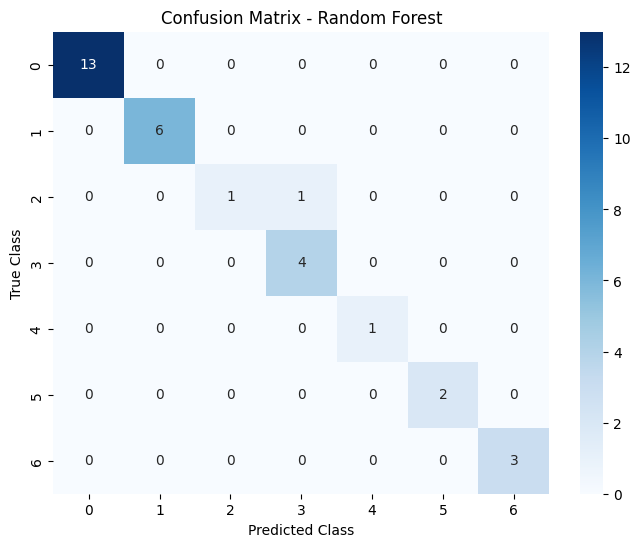

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


/tmp/ipython-input-3445610870.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df.head(15), x="importance", y="feature", palette="viridis")


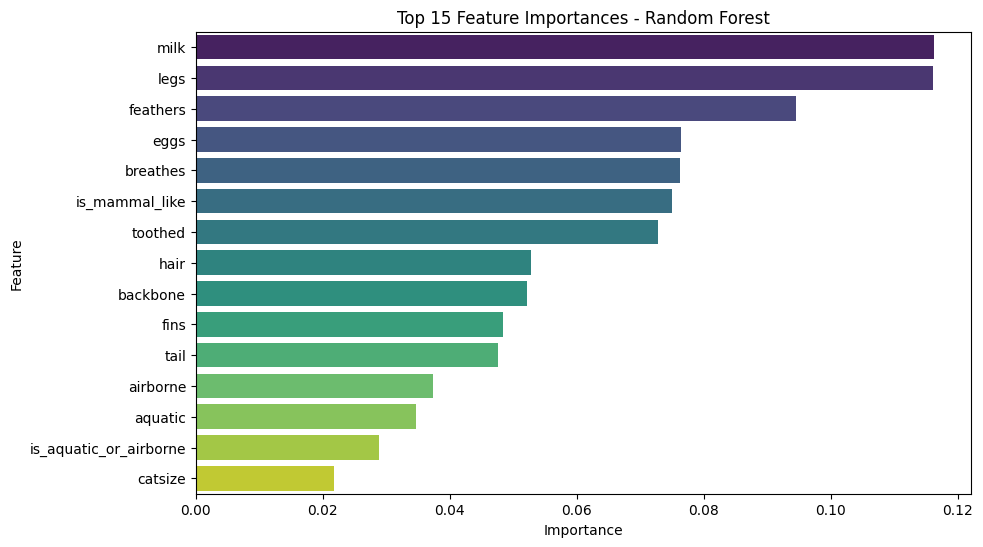

In [42]:
# Feature importance from the trained RandomForest
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame
fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Plot Top 15 features
plt.figure(figsize=(10,6))
sns.barplot(data=fi_df.head(15), x="importance", y="feature", palette="viridis")
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

# Train KNN
knn_model.fit(X_train, y_train)

# KNN Testing accuracy
knn_accuracy = knn_model.score(X_test, y_test)

print(f"KNN (k=5) Test Accuracy: {knn_accuracy:.4f}")


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values